In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy.signal import argrelextrema


# Define the directory where your NetCDF files are located
directory = '/Users/tobias/'

# Generate a list of file paths for the years 1991 to 2020
# file_paths = [directory + f'era_uvwTo3vor_zmmm_Clim{i}.nc' for i in range(1991, 2020+1)]
file = directory + f'era5_Tuvw_mlmmzm_clim_hPa.nc'

# Open all the NetCDF files using xarray.open_mfdataset
ds = xr.open_dataset(file)
ds = ds.squeeze(dim='lon')

In [3]:
def calculate_altitudes_linear(ds_plev,pressure_geom_altitude):    

    # Unpack the pressure and geopotential altitude data
    pressures, geom_altitudes = zip(*pressure_geom_altitude)

    # Interpolate to get the geopotential altitude for each pressure level in ds.plev
    geometric_altitudes = np.interp(ds_plev, pressures, geom_altitudes)

    return geometric_altitudes

In [4]:
# Define the pressure-geom altitude table
pressure_geom_altitude = [
    [0.0100, 80301.65],
    [0.0255, 74584.91],
    [0.0388, 71918.79],
    [0.0575, 69365.77],
    [0.0829, 66906.53],
    [0.1168, 64537.43],
    [0.1611, 62254.39],
    [0.2180, 60053.46],
    [0.2899, 57930.78],
    [0.3793, 55882.68],
    [0.4892, 53905.62],
    [0.6224, 51996.21],
    [0.7821, 50159.36],
    [0.9716, 48413.94],
    [1.1942, 46756.98],
    [1.4535, 45199.69],
    [1.7531, 43738.55],
    [2.0965, 42364.93],
    [2.4875, 41071.20],
    [2.9298, 39850.56],
    [3.4270, 38696.94],
    [3.9829, 37604.95],
    [4.6010, 36569.72],
    [5.2851, 35586.89],
    [6.0388, 34652.52],
    [6.8654, 33763.05],
    [7.7686, 32915.27],
    [8.7516, 32106.57],
    [9.8177, 31330.96],
    [10.9703, 30584.71],
    [12.2123, 29866.09],
    [13.5469, 29173.50],
    [14.9770, 28505.47],
    [16.5054, 27860.64],
    [18.1348, 27237.73],
    [19.8681, 26635.56],
    [21.7076, 26053.04],
    [23.6560, 25489.15],
    [25.7156, 24942.93],
    [27.8887, 24413.50],
    [30.1776, 23900.02],
    [32.5843, 23401.71],
    [35.1111, 22917.85],
    [37.7598, 22447.75],
    [40.5321, 21990.82],
    [43.4287, 21546.62],
    [46.4498, 21114.77],
    [49.5952, 20694.90],
    [52.8644, 20286.66],
    [56.2567, 19889.88],
    [59.7721, 19503.09],
    [63.4151, 19125.61],
    [67.1941, 18756.34],
    [71.1187, 18394.25],
    [75.1999, 18038.35],
    [79.4496, 17687.77],
    [83.8816, 17341.62],
    [88.5112, 16999.08],
    [93.3527, 16659.55],
    [98.4164, 16322.83],
    [103.7100, 15988.88],
    [109.2417, 15657.70],
    [115.0198, 15329.24],
    [121.0526, 15003.50],
    [127.3487, 14680.44],
    [133.9170, 14360.05],
    [140.7663, 14042.30],
    [147.9058, 13727.18],
    [155.3448, 13414.65],
    [163.0927, 13104.70],
    [171.1591, 12797.30],
    [179.5537, 12492.44],
    [188.2867, 12190.10],
    [197.3679, 11890.24],
    [206.8078, 11592.86],
    [216.6166, 11297.93],
    [226.8050, 11005.69],
    [237.3837, 10714.22],
    [248.3634, 10422.64],
    [259.7553, 10130.98],
    [271.5704, 9839.26],
    [283.8200, 9547.49],
    [296.5155, 9255.70],
    [309.6684, 8963.90],
    [323.2904, 8672.11],
    [337.3932, 8380.36],
    [351.9887, 8088.67],
    [367.0889, 7797.04],
    [382.7058, 7505.51],
    [398.8516, 7214.09],
    [415.5387, 6922.80],
    [432.7792, 6631.66],
    [450.5858, 6340.68],
    [468.9708, 6049.89],
    [487.9470, 5759.30],
    [507.5021, 5469.30],
    [527.5696, 5180.98],
    [548.0312, 4896.02],
    [568.7678, 4615.92],
    [589.6797, 4341.73],
    [610.6646, 4074.41],
    [631.6194, 3814.82],
    [652.4424, 3563.69],
    [673.0352, 3321.67],
    [693.3043, 3089.25],
    [713.1631, 2866.83],
    [732.5325, 2654.69],
    [751.3426, 2452.99],
    [769.5329, 2261.80],
    [787.0528, 2081.09],
    [803.8622, 1910.76],
    [819.9302, 1750.63],
    [835.2358, 1600.44],
    [849.7668, 1459.91],
    [863.5190, 1328.70],
    [876.4957, 1206.44],
    [888.7066, 1092.73],
    [900.1669, 987.15],
    [910.8965, 889.29],
    [920.9193, 798.72],
    [930.2618, 715.02],
    [938.9532, 637.76],
    [947.0240, 566.54],
    [954.5059, 500.95],
    [961.4311, 440.61],
    [967.8315, 385.16],
    [973.7392, 334.24],
    [979.1852, 287.52],
    [984.2002, 244.69],
    [988.8133, 205.44],
    [993.0527, 169.51],
    [996.9452, 136.62],
    [1000.5165, 106.54],
    [1003.7906, 79.04],
    [1006.7900, 53.92],
    [1009.5363, 30.96],
    [1012.0494, 10.00]
]

In [2]:
# Define the seasons
seasons = ['DJF', 'MAM', 'JJA', 'SON']

# Calculate extrema pressures for each season
extrema_pressures = {}

for season in seasons:
    print(season)
    seasonal_data = ds.where(ds['time.season'] == season)
    latitude_data = seasonal_data.lat.values
    pressure_data = seasonal_data.plev.values

    extrema_pressures[season] = {
        'tropopause': [],  # Initialize as an empty list
        'stratopause': [],
#        'mesopause': [],
    }

    for lat_idx, lat in enumerate(latitude_data):
        lat_data = seasonal_data.sel(lat=lat).mean(dim='time')
        temperature_data = lat_data.t.values

        # Check for NaN values and remove them
        non_nan_indices = ~np.isnan(temperature_data)
        temperature_data = temperature_data[non_nan_indices]

        # Find local minima in the temperature data
        local_minima_indices = argrelextrema(temperature_data, np.less)
        local_maxima_indices = argrelextrema(temperature_data, np.greater)

        # Get the corresponding pressure values for the extrema
        local_minima_pressures = pressure_data[non_nan_indices][local_minima_indices]
        local_maxima_pressures = pressure_data[non_nan_indices][local_maxima_indices]

        # Identify Tropopause and Mesopause
        #if len(temperature_data) < 42:
            # If there are no valid temperature values, assign NaN to the tropopause
        #    extrema_pressures[season]['tropopause'].append(np.nan)
        #elif len(local_minima_pressures) >= 1:
        if len(local_minima_pressures) >= 1:
            #extrema_pressures[season]['tropopause'].append(local_minima_pressures[0])
            extrema_pressures[season]['tropopause'].append(local_minima_pressures.max())
        #if len(local_minima_pressures) >= 2:
        #    extrema_pressures[season]['mesopause'].append(local_minima_pressures[1])
        #else:
        #    extrema_pressures[season]['mesopause'].append(np.nan)
            
        # Check if there's a Stratopause extrema
        if len(local_maxima_pressures) > 0:
            extrema_pressures[season]['stratopause'].append(local_maxima_pressures[0])



DJF
MAM
JJA
SON


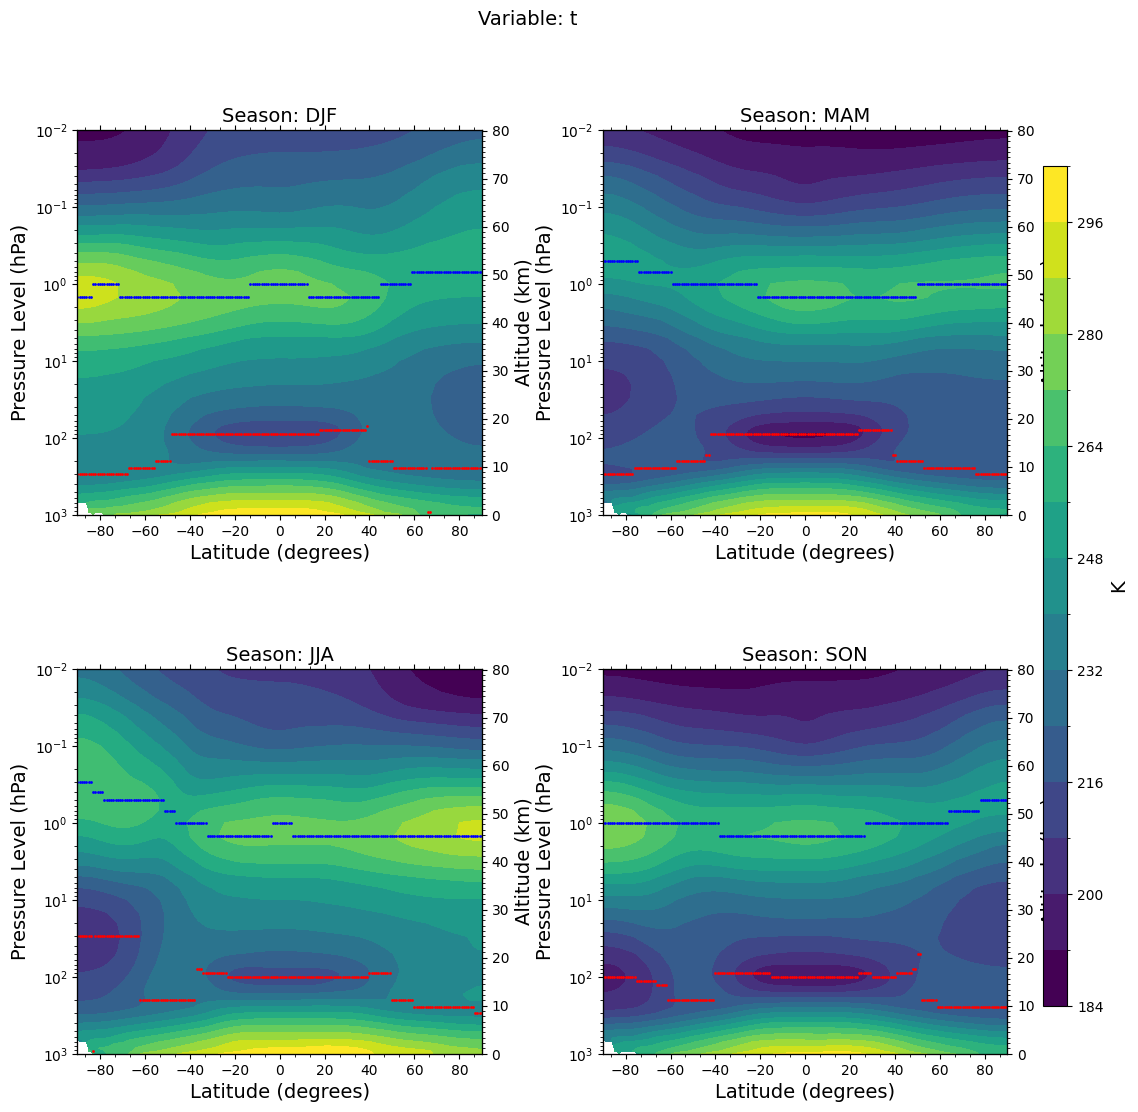

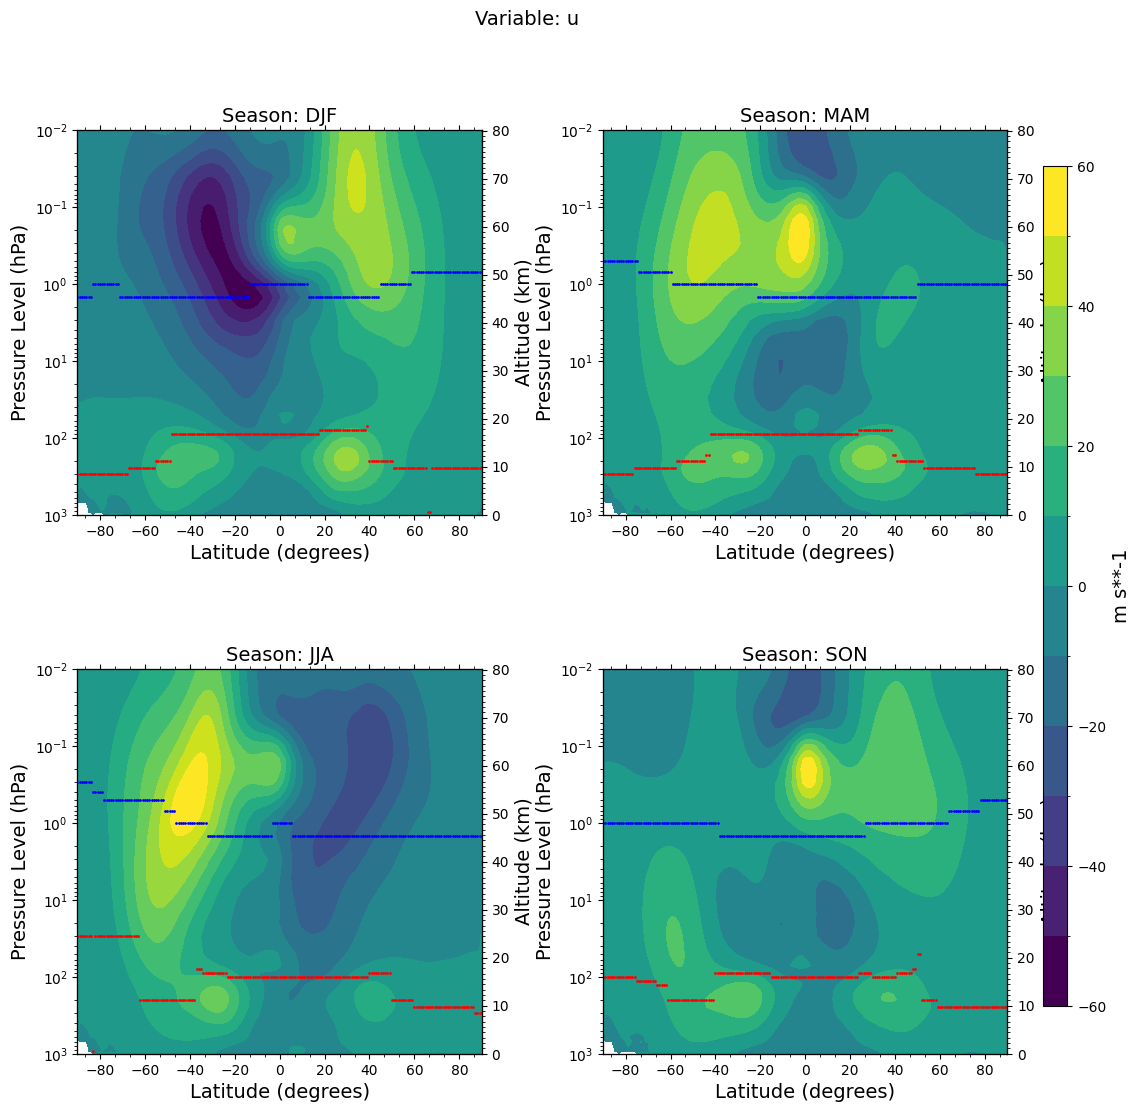

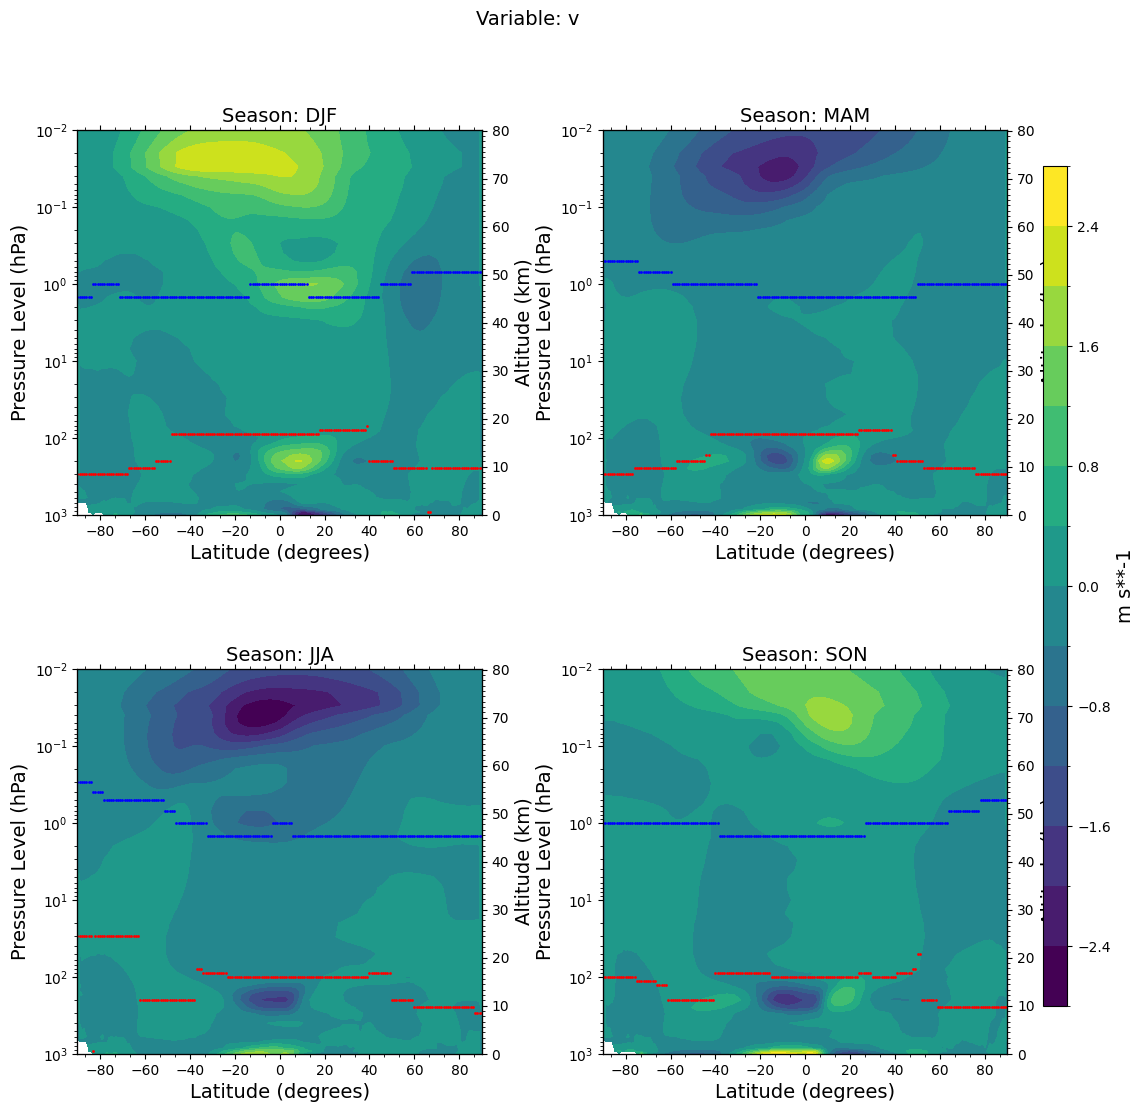

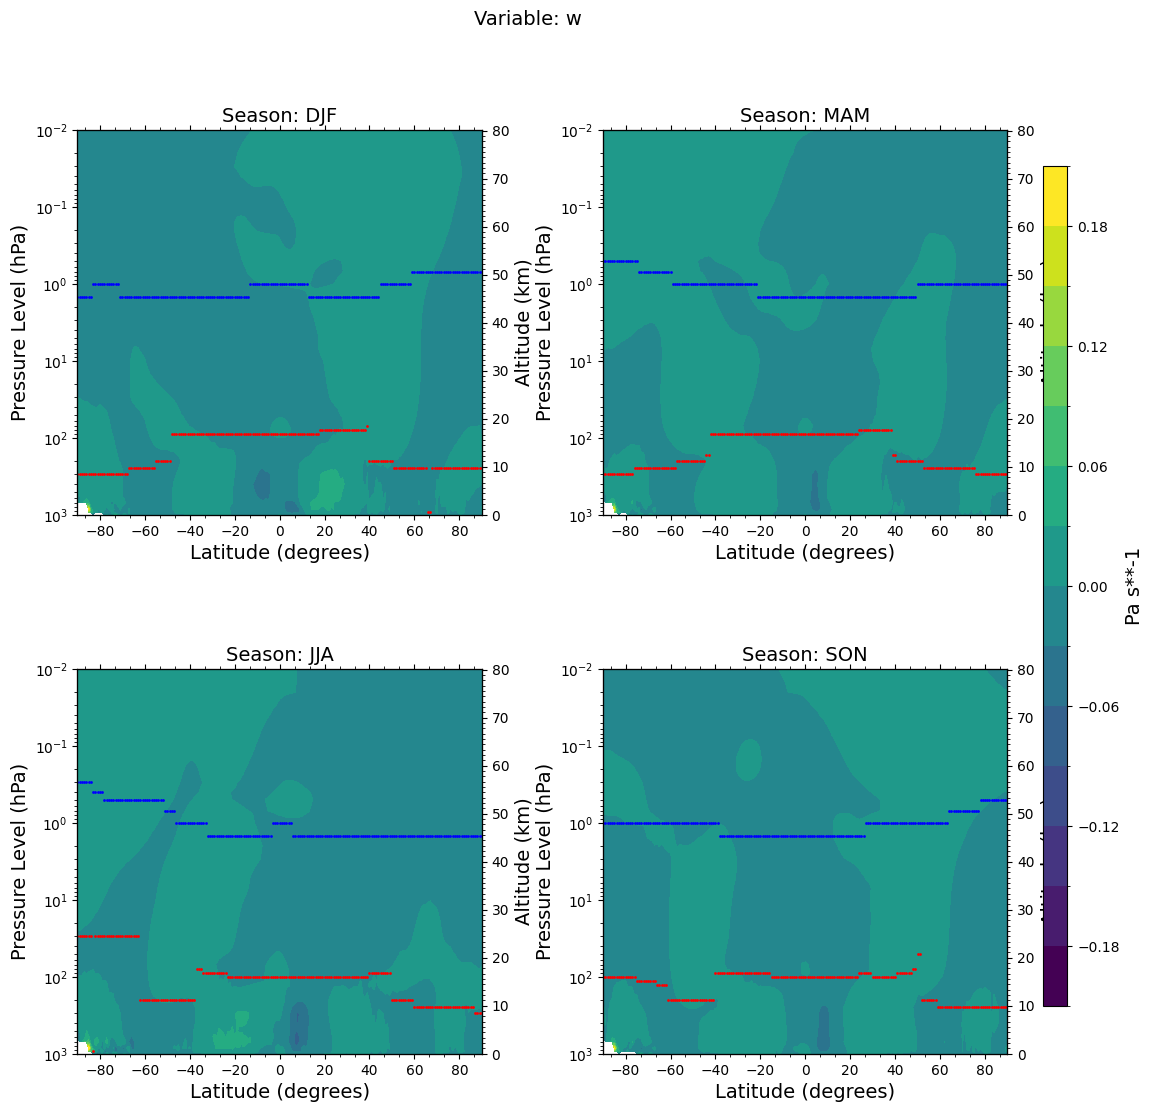

In [11]:
# Define the variables
variables = ['t', 'u', 'v', 'w']

# Create an array of altitudes based on your calculation
altitudes = calculate_altitudes_linear(ds['plev'], pressure_geom_altitude) / 1000

# Create a minor locator for altitude ticks at 10 km intervals with 9 minor ticks
minor_locator = AutoMinorLocator(9)
fsize = 14
# Plot the extrema pressures against latitude for each variable and season
for variable in variables:
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle(f'Variable: {variable}', fontsize=fsize)

    variable_units = ds[variable].units if variable in ds else 'Unknown Units'

    for i, season in enumerate(seasons):
        row = i // 2
        col = i % 2

        if variable in ds:
            seasonal_data = ds[variable].where(ds['time.season'] == season).mean(dim='time')

            # Plot the seasonal data
            contour = seasonal_data.plot.contourf(levels=15, cmap='viridis', add_colorbar=False, yscale='log', ax=axes[row, col])

            # Plot extrema pressures against latitude for Tropopause, Mesopause, and Stratopause
            # Check if there's a Stratopause extrema to plot
            if len(extrema_pressures[season]['tropopause']) > 0:
                axes[row, col].plot(latitude_data, extrema_pressures[season]['tropopause'], 'r.', markersize=2, label='Tropopause')
            # Check if there's a Stratopause extrema to plot
            # if len(extrema_pressures[season]['mesopause']) > 0:
            #    axes[row, col].plot(latitude_data, extrema_pressures[season]['mesopause'], 'g.', markersize=5, label='Mesopause')
            # Check if there's a Stratopause extrema to plot
            if len(extrema_pressures[season]['stratopause']) > 0:
                axes[row, col].plot(latitude_data, extrema_pressures[season]['stratopause'], 'b.', markersize=2, label='Stratopause')

            # Create a secondary y-axis
            secax = axes[row, col].twinx()
            secax.set_ylabel('Altitude (km)', fontsize=fsize)
            
            # Set the secondary y-axis label and positions
            secax.yaxis.set_major_locator(MultipleLocator(10))  # Major ticks every 10 km
            secax.yaxis.set_minor_locator(minor_locator)  # 9 minor ticks between major ticks
            secax.set_ylim(altitudes.min(), altitudes.max())  # Set the y-axis limits

            # Add secondary y-axis tick labels based on altitudes
            secax.set_yticks(np.arange(altitudes.min(), altitudes.max() + 1, 10))
            secax.set_yticklabels([f'{int(alt)}' for alt in np.arange(altitudes.min(), altitudes.max() + 1, 10)])

            # Create a secondary x-axis for latitude
            secax_x = axes[row, col].twiny()
            secax_x.set_xlim(axes[row, col].get_xlim())  # Match the x-axis limits
            # Remove secondary x-axis tick labels
            secax_x.set_xticklabels([])

            minor_x_locator = AutoMinorLocator(3)
            axes[row, col].xaxis.set_minor_locator(minor_x_locator)
            secax_x.xaxis.set_minor_locator(minor_x_locator)

            
            axes[row, col].set_xlabel('Latitude (degrees)', fontsize=fsize)
            axes[row, col].set_ylabel('Pressure Level (hPa)', fontsize=fsize)
            axes[row, col].set_title(f'Season: {season}', fontsize=fsize)

            # Reverse the y-axis
            axes[row, col].invert_yaxis()

    # Add a color bar to the right of the subplots
    cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
    cbar = plt.colorbar(contour, cbar_ax)
    cbar.set_label(variable_units, fontsize=fsize)

    plt.subplots_adjust(wspace=0.3, hspace=0.4)
    plt.savefig(f'era5clim_{variable}.pdf')
    plt.show()